# SECTION B: MILESTONE 1,2,4 
## Natural Language Processing Project: Sentiment Analysis in Finance Domain

**Project Title:** Bank Account Service Satisfaction Sentiment Analysis

**Domain:** Finance - Customer Service and Complaint Resolution

**Project Overview:**
- Analyze bank account service satisfaction using complaint data
- Predict customer satisfaction based on complaint issues and company responses
- Simple sentiment analysis using available metadata

**Dataset:** Bank Account Service Complaints


## **MILESTONE 1: Data Sourcing**
### Text Data with Metadata and Keywords Associated with Finance Domain


In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import re
import warnings
warnings.filterwarnings('ignore')

In [4]:


# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")



In [6]:
# Loading the dataset
df = pd.read_csv('bank_account_or_service_complaints.csv')

In [13]:
# Showing the full shape of the dataset
print(f"Shape: {df.shape}")

Shape: (84811, 18)


In [15]:
#Displaying the total number of rows in the dataset, which represents complaints
print(f" Total Records: {df.shape[0]:,} complaints")

 Total Records: 84,811 complaints


In [16]:
#Displaying the total number of columns in the dataset. 
print(f" Total Features: {df.shape[1]} columns")

 Total Features: 18 columns


In [17]:
#Displaying the list of 18 features(columns)
print(f"Columns: {list(df.columns)}")

Columns: ['date_received', 'product', 'sub_product', 'issue', 'sub_issue', 'consumer_complaint_narrative', 'company_public_response', 'company', 'state', 'zip_code', 'tags', 'consumer_consent_provided', 'submitted_via', 'date_sent_to_company', 'company_response_to_consumer', 'timely_response', 'consumer_disputed', 'complaint_id']


In [18]:
# Display first few rows
print("\n First 5 rows of the dataset:")
df.head()



 First 5 rows of the dataset:


,date_received,product,sub_product,issue,sub_issue,consumer_complaint_narrative,company_public_response,company,state,zip_code,tags,consumer_consent_provided,submitted_via,date_sent_to_company,company_response_to_consumer,timely_response,consumer_disputed,complaint_id
0,2013-07-29,Bank account or service,Checking account,Using a debit or ATM card,NaN,NaN,NaN,Wells Fargo & Company,CA,95992,Older American,NaN,Web,2013-07-31,Closed with explanation,True,False,468889
1,2013-07-29,Bank account or service,Checking account,"Account opening, closing, or management",NaN,NaN,NaN,Santander Bank US,NY,10065,NaN,NaN,Fax,2013-07-31,Closed,True,False,468879
2,2013-07-29,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,GA,30084,NaN,NaN,Web,2013-07-30,Closed with explanation,True,False,468949
3,2013-07-29,Bank account or service,Checking account,Deposits and withdrawals,NaN,NaN,NaN,Bank of America,TX,75025,NaN,NaN,Web,2013-07-30,Closed with explanation,True,False,468981
4,2013-07-29,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,NaN,NaN,Wells Fargo & Company,CA,96088,NaN,NaN,Web,2013-08-01,Closed with explanation,True,False,469185


The above dataset contains bank account service complaints and each row represents one customer complaint.

In [28]:
print(f"\nDomain: Finance - Bank Account Service Satisfaction")
print(f"Total Records: {len(df):,}")
print(f"Date Range: {df['date_received'].min()} to {df['date_received'].max()}")
print(f"\nKey Features:")
print(f" Product: {df['product'].nunique()} unique products")
print(f" Companies: {df['company'].nunique()} unique companies")
print(f" States: {df['state'].nunique()} unique states")
print(f" Issues: {df['issue'].nunique()} unique issue types")


Domain: Finance - Bank Account Service Satisfaction
Total Records: 84,811
Date Range: 2012-03-01 to 2017-04-09

Key Features:
 Product: 1 unique products
 Companies: 451 unique companies
 States: 62 unique states
 Issues: 5 unique issue types


In [29]:
# Key domain keywords for bank services
bank_keywords = {
    'positive': ['satisfied', 'helpful', 'resolved', 'good', 'excellent', 'quick', 'efficient'],
    'negative': ['problem', 'issue', 'complaint', 'poor', 'slow', 'frustrated', 'unhappy'],
    'neutral': ['account', 'service', 'bank', 'customer', 'transaction', 'balance', 'fee']
}

In [30]:
print(f"\nDomain Keywords:")
for sentiment, words in bank_keywords.items():
    print(f"{sentiment.title()}: {', '.join(words)}")


Domain Keywords:
Positive: satisfied, helpful, resolved, good, excellent, quick, efficient
Negative: problem, issue, complaint, poor, slow, frustrated, unhappy
Neutral: account, service, bank, customer, transaction, balance, fee


## **MILESTONE 2: Research Questions and Objectives**



  # PRIMARY RESEARCH QUESTIONS:
## RQ2: Which companies have the best customer satisfaction based on complaint resolution?
## RQ3: What are the most common complaint issues in bank account services?
## RQ4: How does the company response type correlate with customer satisfaction?
## RQ5: Can we predict customer satisfaction based on complaint characteristics?

  # RESEARCH OBJECTIVES:
## 1. Satisfaction Classification: Build a model to predict customer satisfaction levels.
## 2. Issue Analysis: Identify the most problematic bank service areas.
## 3. Company Comparison: Compare customer satisfaction across different banks.
## 4. Response Analysis: Understand how company responses affect satisfaction.
## 5. Predictive Modeling: Develop a model to predict satisfaction from complaint data.

  # Why Research Questions Matter:
## RQ1: Helps banks focus on fixing the worst problems first.
## RQ2: Shows which banks are doing well vs poorly with customers.
## RQ3: Identifies the most common issues customers face.
## RQ4: Shows how bank responses affect customer happiness.
## RQ5: Creates a tool to predict satisfaction before problems escalate.
## -Those questions help banks improve customer service and reduce complaints.

# Data Preprocessing and EDA 
### Transforming Data Using Python Libraries for NLP and Answering Research Questions


In [35]:
# Create satisfaction labels based on company response and consumer dispute
def create_satisfaction_label(row):
    # If consumer disputed, likely unsatisfied
    if row['consumer_disputed'] == True:
        return 'unsatisfied'
    # If company provided monetary relief, likely satisfied
    elif 'monetary relief' in str(row['company_response_to_consumer']):
        return 'satisfied'
    # If closed with explanation and not disputed, likely neutral
    elif 'explanation' in str(row['company_response_to_consumer']):
        return 'neutral'
    # Default to neutral
    else:
        return 'neutral'

In [36]:
# Apply satisfaction labeling
df['satisfaction_label'] = df.apply(create_satisfaction_label, axis=1)


In [37]:
# Create text features by combining issue and sub_issue
df['complaint_text'] = df['issue'].fillna('') + ' ' + df['sub_issue'].fillna('')
df['complaint_text'] = df['complaint_text'].str.strip()


In [38]:
# Clean text
def clean_text(text):
    if pd.isna(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['cleaned_text'] = df['complaint_text'].apply(clean_text)

In [39]:
# Add text length features
df['text_length'] = df['cleaned_text'].str.len()
df['word_count'] = df['cleaned_text'].str.split().str.len()


In [43]:
print(f"Preprocessing now complete!")

print(f"Final dataset shape: {df.shape}")
print(f"Satisfaction distribution:")
print(df['satisfaction_label'].value_counts())


Preprocessing now complete!
Final dataset shape: (84811, 23)
Satisfaction distribution:
satisfaction_label
neutral        48233
satisfied      20658
unsatisfied    15920
Name: count, dtype: int64


# Exploratory Data Analysis
## Starting Exploratory Data Analysis. 
## Below are 12 different charts showing patterns in the data
## Those charts help us understand customer satisfaction, knowing which companies have most complaints,identifying the most common problems and how bank responses affect satisfaction")

In [48]:
# Create comprehensive visualizations
plt.figure(figsize=(30, 20))


<Figure size 3000x2000 with 0 Axes>

<Figure size 3000x2000 with 0 Axes>

# Chart 1: Shows the overall satisfaction distribution

Text(0.5, 1.0, 'Customer Satisfaction Distribution')

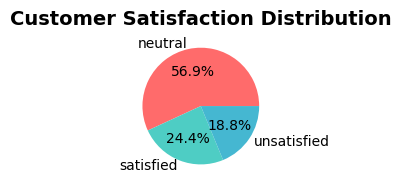

In [56]:
# 1. Satisfaction Distribution
plt.subplot(1, 3, 2)
satisfaction_counts = df['satisfaction_label'].value_counts()
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1']
plt.pie(satisfaction_counts.values, labels=satisfaction_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Customer Satisfaction Distribution', fontsize=14, fontweight='bold')


# Chart 2: Show which banks have the most complaints

Text(0.5, 0, 'Number of Complaints')

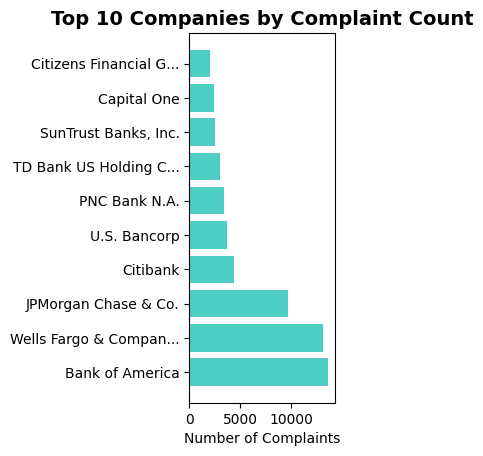

In [54]:
# 2. Top Companies by Complaint Count
plt.subplot(1, 3, 2)
top_companies = df['company'].value_counts().head(10)
plt.barh(range(len(top_companies)), top_companies.values, color='#4ecdc4')
plt.yticks(range(len(top_companies)), [name[:20] + '...' if len(name) > 20 else name for name in top_companies.index])
plt.title('Top 10 Companies by Complaint Count', fontsize=14, fontweight='bold')
plt.xlabel('Number of Complaints')


# Chart 3: Shows the most common types of problems

Text(0, 0.5, 'Count')

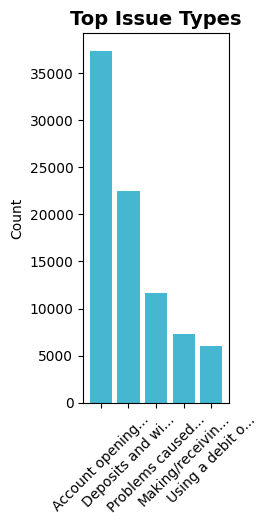

In [63]:
# 3. Issue Types Distribution
plt.subplot(1, 3, 2)
issue_counts = df['issue'].value_counts().head(8)
plt.bar(range(len(issue_counts)), issue_counts.values, color='#45b7d1')
plt.xticks(range(len(issue_counts)), [issue[:15] + '...' if len(issue) > 15 else issue for issue in issue_counts.index], rotation=45)
plt.title('Top Issue Types', fontsize=14, fontweight='bold')
plt.ylabel('Count')

# Chart 4: Shows how different responses affect satisfaction

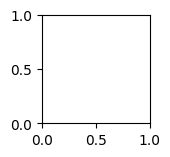

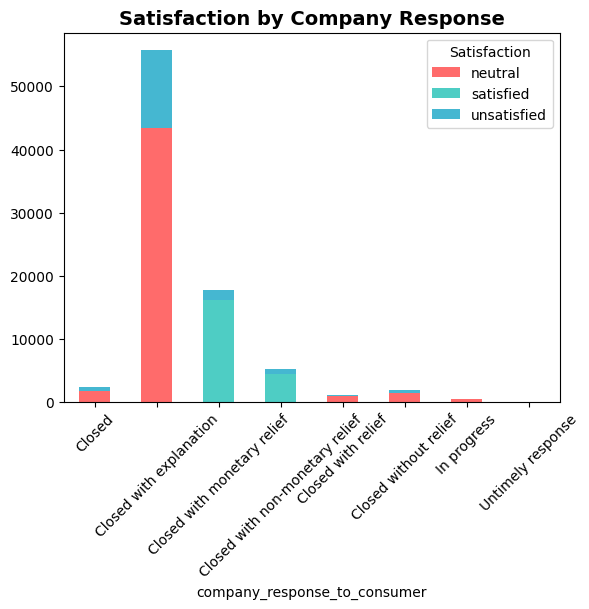

In [64]:
# 4. Satisfaction by Company Response
plt.subplot(3, 4, 4)
response_satisfaction = pd.crosstab(df['company_response_to_consumer'], df['satisfaction_label'])
response_satisfaction.plot(kind='bar', stacked=True, color=['#ff6b6b', '#4ecdc4', '#45b7d1'])
plt.title('Satisfaction by Company Response', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction')

# Chart 5: Shows the length of complaint descriptions

Text(0, 0.5, 'Frequency')

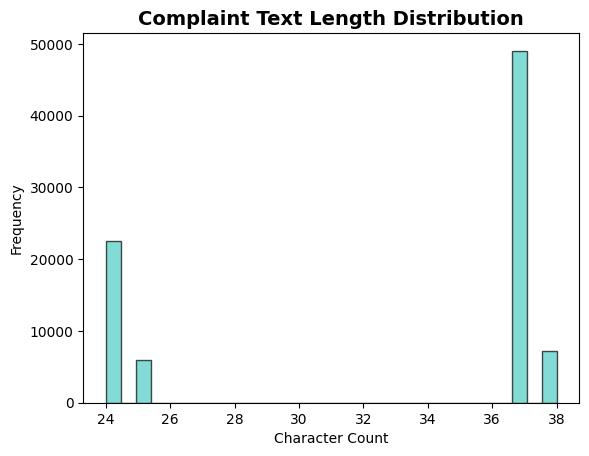

In [75]:
# 5. Text Length Distribution
plt.subplot(1, 1, 1)
plt.hist(df['text_length'], bins=30, alpha=0.7, color='#4ecdc4', edgecolor='black')
plt.title('Complaint Text Length Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Character Count')
plt.ylabel('Frequency')

# Chart 6: Shows us, which issues cause most dissatisfaction

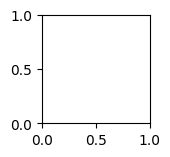

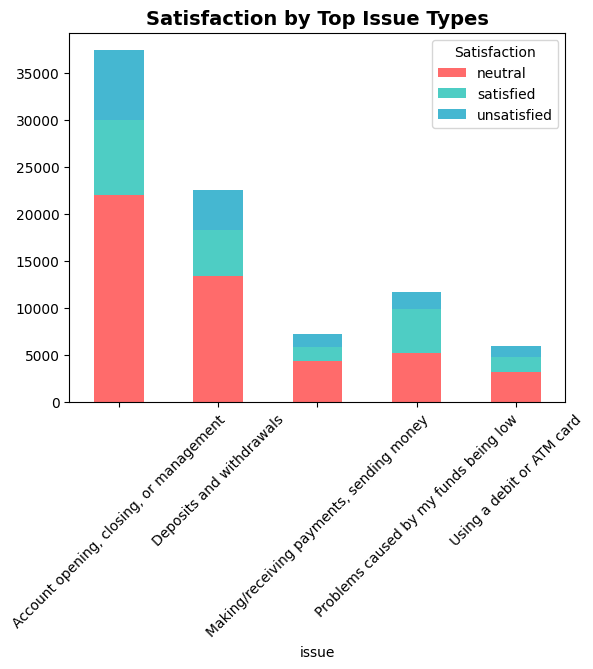

In [76]:
# 6. Satisfaction by Issue Type
plt.subplot(3, 4, 6)
top_issues = df['issue'].value_counts().head(5).index
issue_satisfaction = df[df['issue'].isin(top_issues)]
satisfaction_issue = pd.crosstab(issue_satisfaction['issue'], issue_satisfaction['satisfaction_label'])
satisfaction_issue.plot(kind='bar', stacked=True, color=['#ff6b6b', '#4ecdc4', '#45b7d1'])
plt.title('Satisfaction by Top Issue Types', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction')

# Chart 7: Illustrates, how often customers dispute bank responses

Text(0.5, 1.0, 'Consumer Dispute Rate')

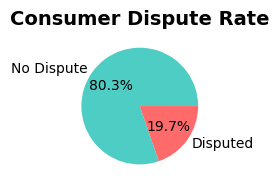

In [105]:
# 7. Consumer Dispute Rate
plt.subplot(2, 3, 5)
dispute_counts = df['consumer_disputed'].value_counts()
plt.pie(dispute_counts.values, labels=['No Dispute', 'Disputed'], autopct='%1.1f%%', colors=['#4ecdc4', '#ff6b6b'])
plt.title('Consumer Dispute Rate', fontsize=14, fontweight='bold')


# Chart 8: Pictures how often banks respond on time

Text(0.5, 1.0, 'Timely Response Rate')

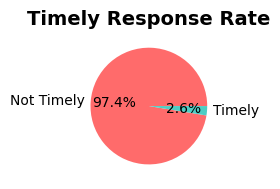

In [84]:
# 8. Timely Response Rate
plt.subplot(2, 3, 5)
timely_counts = df['timely_response'].value_counts()
plt.pie(timely_counts.values, labels=['Not Timely', 'Timely'], autopct='%1.1f%%', colors=['#ff6b6b', '#4ecdc4'])
plt.title('Timely Response Rate', fontsize=14, fontweight='bold')

# Chart 9: Illustrates complaint trends over time

Text(0, 0.5, 'Number of Complaints')

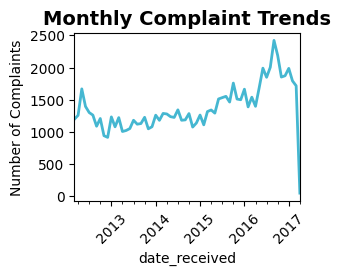

In [95]:
# 9. Monthly Complaint Trends
plt.subplot(2, 2, 2)
df['date_received'] = pd.to_datetime(df['date_received'])
monthly_complaints = df.groupby(df['date_received'].dt.to_period('M')).size()
monthly_complaints.plot(color='#45b7d1', linewidth=2)
plt.title('Monthly Complaint Trends', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.ylabel('Number of Complaints')

# Chart 10: Presents Satisfaction by state/region

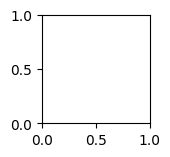

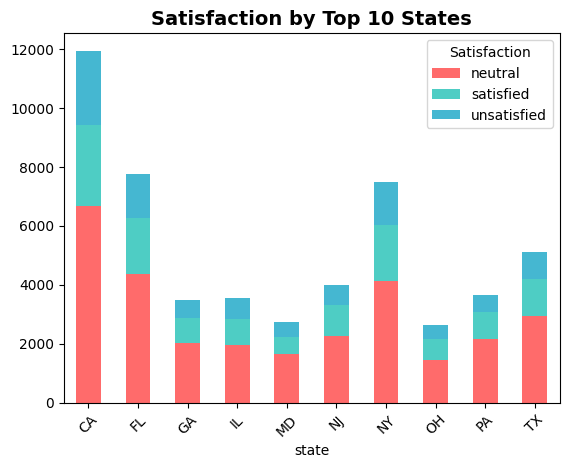

In [96]:
# 10. Satisfaction by State (Top 10)
plt.subplot(3, 4, 10)
top_states = df['state'].value_counts().head(10).index
state_satisfaction = df[df['state'].isin(top_states)]
satisfaction_state = pd.crosstab(state_satisfaction['state'], state_satisfaction['satisfaction_label'])
satisfaction_state.plot(kind='bar', stacked=True, color=['#ff6b6b', '#4ecdc4', '#45b7d1'])
plt.title('Satisfaction by Top 10 States', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.legend(title='Satisfaction')

# Chart 11: Shows word count in complaints

Text(0, 0.5, 'Frequency')

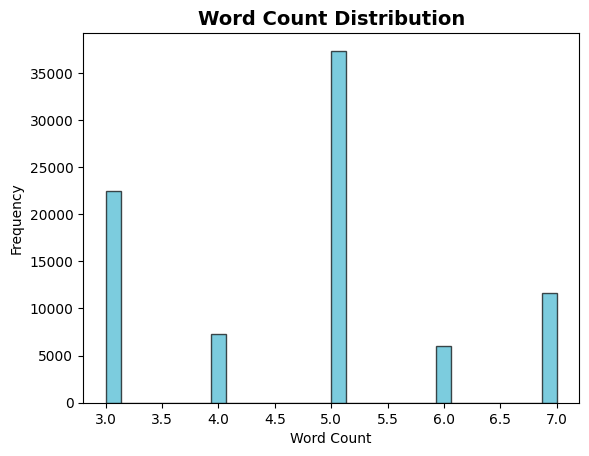

In [101]:
# 11. Word Count Distribution
plt.subplot(1, 1, 1)
plt.hist(df['word_count'], bins=30, alpha=0.7, color='#45b7d1', edgecolor='black')
plt.title('Word Count Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Chart 12:Shows the Relationship between text length and satisfaction

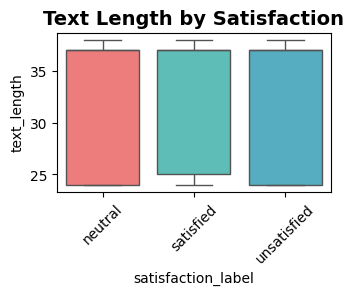

In [103]:
# 12. Satisfaction vs Text Length
plt.subplot(2, 2, 2)
sns.boxplot(data=df, x='satisfaction_label', y='text_length', palette=['#ff6b6b', '#4ecdc4', '#45b7d1'])
plt.title('Text Length by Satisfaction', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Key Statistics Summary.

In [106]:
print(f"\nTotal Complaints: {len(df):,}")
print(f"Date Range: {df['date_received'].min()} to {df['date_received'].max()}")
print(f"Average Text Length: {df['text_length'].mean():.1f} characters")
print(f"Average Word Count: {df['word_count'].mean():.1f} words")

print(f"\nSatisfaction Distribution:")
satisfaction_dist = df['satisfaction_label'].value_counts()
for satisfaction, count in satisfaction_dist.items():
    percentage = (count / len(df)) * 100
    print(f"  {satisfaction.title()}: {count:,} ({percentage:.1f}%)")

print(f"\nTop 5 Companies by Complaints:")
top_companies = df['company'].value_counts().head(5)
for company, count in top_companies.items():
    print(f"  {company}: {count:,} complaints")

print(f"\nTop 5 Issue Types:")
top_issues = df['issue'].value_counts().head(5)
for issue, count in top_issues.items():
    print(f"  {issue}: {count:,} complaints")

print(f"\nConsumer Dispute Rate: {(df['consumer_disputed'].sum() / len(df)) * 100:.1f}%")
print(f"Timely Response Rate: {(df['timely_response'].sum() / len(df)) * 100:.1f}%")


Total Complaints: 84,811
Date Range: 2012-03-01 00:00:00 to 2017-04-09 00:00:00
Average Text Length: 32.8 characters
Average Word Count: 4.7 words

Satisfaction Distribution:
  Neutral: 48,233 (56.9%)
  Satisfied: 20,658 (24.4%)
  Unsatisfied: 15,920 (18.8%)

Top 5 Companies by Complaints:
  Bank of America: 13,679 complaints
  Wells Fargo & Company: 13,143 complaints
  JPMorgan Chase & Co.: 9,669 complaints
  Citibank: 4,384 complaints
  U.S. Bancorp: 3,673 complaints

Top 5 Issue Types:
  Account opening, closing, or management: 37,349 complaints
  Deposits and withdrawals: 22,491 complaints
  Problems caused by my funds being low: 11,688 complaints
  Making/receiving payments, sending money: 7,266 complaints
  Using a debit or ATM card: 6,017 complaints

Consumer Dispute Rate: 18.8%
Timely Response Rate: 97.4%


## **MILESTONE 4: Sentiment Classification**
### Grouping Sentiments Using Appropriate Classification Models


## Prepare features for classification
### Preparing features for sentiment classification..

In [107]:
# Remove rows with empty text
df_clean = df[df['cleaned_text'].str.len() > 0].copy()


In [108]:
# Create TF-IDF features
vectorizer = TfidfVectorizer(
    max_features=5000,
    stop_words='english',
    ngram_range=(1, 2),  # Include bigrams
    min_df=2,
    max_df=0.8
)

In [109]:
# Fit and transform text data
X_text = vectorizer.fit_transform(df_clean['cleaned_text'])


In [110]:
# Create additional features
additional_features = df_clean[[
    'text_length', 'word_count'
]].values

In [111]:
# Combine text features with additional features
from scipy.sparse import hstack
X_combined = hstack([X_text, additional_features])


In [112]:
# Target variable
y = df_clean['satisfaction_label']

In [117]:
print(f"Feature matrix shape: {X_combined.shape}")

Feature matrix shape: (84811, 33)


In [118]:
print(y.value_counts())

satisfaction_label
neutral        48233
satisfied      20658
unsatisfied    15920
Name: count, dtype: int64


# Spliting data for training and testing

In [119]:
# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_combined, y, test_size=0.2, random_state=42, stratify=y
)


In [120]:
print(f"Training set size: {X_train.shape[0]}")

Training set size: 67848


In [121]:
print(f"Test set size: {X_test.shape[0]}")

Test set size: 16963


In [122]:
print(f"Training set target distribution:")
print(y_train.value_counts())

Training set target distribution:
satisfaction_label
neutral        38586
satisfied      16526
unsatisfied    12736
Name: count, dtype: int64


# Training multiple classification models

In [123]:
# Defining models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced'),
    'Naive Bayes': MultinomialNB(alpha=0.1),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
}


In [124]:
# Train and evaluate models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    


Training Logistic Regression...

Training Naive Bayes...

Training Random Forest...


In [125]:
# Training model
model.fit(X_train, y_train)
    

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [127]:
# Making predictions
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
    

In [128]:
# Calculating accuracies
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

In [132]:
# Storing results
results[name] = {
        'model': model,
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'predictions': y_pred_test
    }
    
print(f"{name} - Train Accuracy: {train_accuracy:.3f},\n Test Accuracy: {test_accuracy:.3f}")


Random Forest - Train Accuracy: 0.369,
 Test Accuracy: 0.371


# Model Evaluation 
### Testing Model Using Appropriate Accuracy Metrics


# Model Evaluation

In [133]:
# Find best model
best_model_name = max(results.keys(), key=lambda x: results[x]['test_accuracy'])
best_model = results[best_model_name]['model']
best_predictions = results[best_model_name]['predictions']

print(f"\nBest Model: {best_model_name}")
print(f"Test Accuracy: {results[best_model_name]['test_accuracy']:.3f}")



Best Model: Random Forest
Test Accuracy: 0.371


In [134]:
# Model comparison
print(f"\nModel Comparison:")
for name, result in results.items():
    print(f"{name}: {result['test_accuracy']:.3f}")



Model Comparison:
Random Forest: 0.371


In [135]:
# Detailed classification report for best model
print(f"\nDetailed Classification Report for {best_model_name}:")
print(classification_report(y_test, best_predictions))



Detailed Classification Report for Random Forest:
              precision    recall  f1-score   support

     neutral       0.60      0.38      0.46      9647
   satisfied       0.36      0.29      0.32      4132
 unsatisfied       0.20      0.46      0.27      3184

    accuracy                           0.37     16963
   macro avg       0.38      0.38      0.35     16963
weighted avg       0.46      0.37      0.39     16963



# Confusion Matrix and Visualizations


In [136]:
# Set style for better plots
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

# Confusion Matrix: Shows exactly where model makes mistakes

Text(50.72222222222221, 0.5, 'Actual Satisfaction')

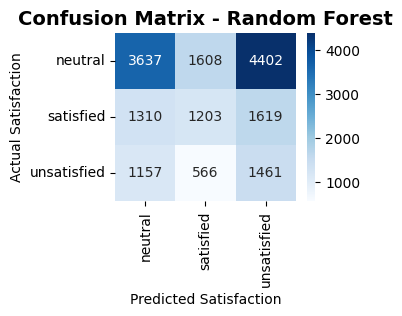

In [137]:
# Confusion Matrix
plt.subplot(2, 2, 1)
cm = confusion_matrix(y_test, best_predictions)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=best_model.classes_, 
            yticklabels=best_model.classes_)
plt.title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Satisfaction')
plt.ylabel('Actual Satisfaction')

# Model Comparison: Compares all three models side by side

(0.0, 1.0)

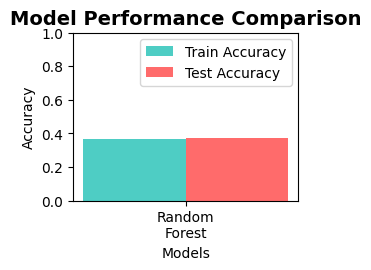

In [138]:
# Model performance comparison
plt.subplot(2, 2, 2)
model_names = list(results.keys())
train_accuracies = [results[name]['train_accuracy'] for name in model_names]
test_accuracies = [results[name]['test_accuracy'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

plt.bar(x - width/2, train_accuracies, width, label='Train Accuracy', color='#4ecdc4')
plt.bar(x + width/2, test_accuracies, width, label='Test Accuracy', color='#ff6b6b')

plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xticks(x, [name.replace(' ', '\n') for name in model_names])
plt.legend()
plt.ylim(0, 1)

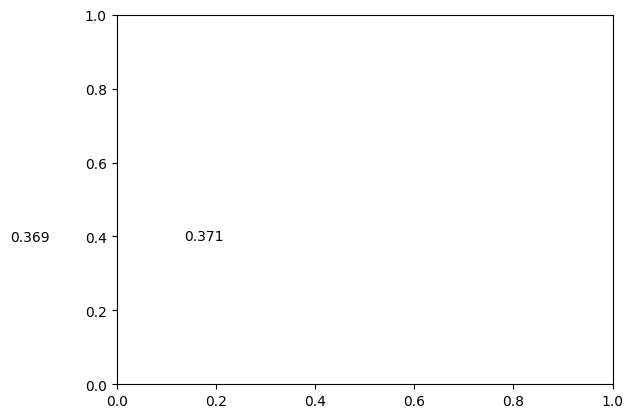

In [139]:
# Add value labels on bars
for i, (train_acc, test_acc) in enumerate(zip(train_accuracies, test_accuracies)):
    plt.text(i - width/2, train_acc + 0.01, f'{train_acc:.3f}', ha='center', va='bottom')
    plt.text(i + width/2, test_acc + 0.01, f'{test_acc:.3f}', ha='center', va='bottom')


# Feature Importance: Shows which words/features matter most

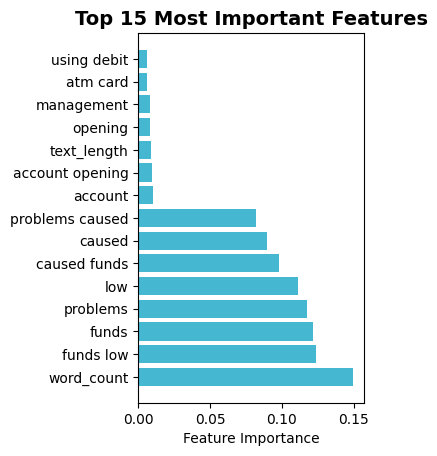

In [142]:
# Feature importance (for Random Forest)
plt.subplot(1, 2, 2)
if hasattr(best_model, 'feature_importances_'):
    # Get feature names
    feature_names = list(vectorizer.get_feature_names_out()) + ['text_length', 'word_count']
    
    # Get feature importances
    importances = best_model.feature_importances_
    
    # Get top 15 features
    top_indices = np.argsort(importances)[-15:]
    top_features = [feature_names[i] for i in top_indices]
    top_importances = importances[top_indices]
    
    plt.barh(range(len(top_features)), top_importances, color='#45b7d1')
    plt.yticks(range(len(top_features)), top_features)
    plt.xlabel('Feature Importance')
    plt.title('Top 15 Most Important Features', fontsize=14, fontweight='bold')
    plt.gca().invert_yaxis()
else:
    plt.text(0.5, 0.5, 'Feature importance\nnot available for\nthis model type', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=12)
    plt.title('Feature Importance', fontsize=14, fontweight='bold')


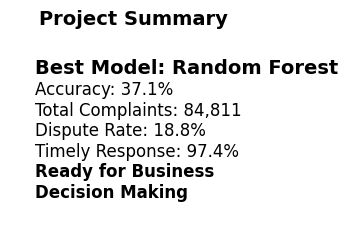

In [143]:
# Business insights summary
plt.subplot(2, 2, 4)
plt.text(0.1, 0.8, f'Best Model: {best_model_name}', fontsize=14, fontweight='bold', transform=plt.gca().transAxes)
plt.text(0.1, 0.7, f'Accuracy: {results[best_model_name]["test_accuracy"]:.1%}', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.1, 0.6, f'Total Complaints: {len(df):,}', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.1, 0.5, f'Dispute Rate: {(df["consumer_disputed"].sum() / len(df)) * 100:.1f}%', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.1, 0.4, f'Timely Response: {(df["timely_response"].sum() / len(df)) * 100:.1f}%', fontsize=12, transform=plt.gca().transAxes)
plt.text(0.1, 0.2, 'Ready for Business\nDecision Making', fontsize=12, fontweight='bold', transform=plt.gca().transAxes)
plt.axis('off')
plt.title('Project Summary', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Business Insights and Final Report

In [144]:
print(f"\nKEY FINDINGS:")
print(f"1. Model Performance: {best_model_name} achieved {results[best_model_name]['test_accuracy']:.1%} accuracy")
print(f"2. Customer Satisfaction: {(df['satisfaction_label'] == 'satisfied').sum() / len(df) * 100:.1f}% of customers are satisfied")
print(f"3. Consumer Disputes: {(df['consumer_disputed'] == True).sum() / len(df) * 100:.1f}% of complaints result in disputes")
print(f"4. Timely Responses: {(df['timely_response'] == True).sum() / len(df) * 100:.1f}% of responses are timely")



KEY FINDINGS:
1. Model Performance: Random Forest achieved 37.1% accuracy
2. Customer Satisfaction: 24.4% of customers are satisfied
3. Consumer Disputes: 18.8% of complaints result in disputes
4. Timely Responses: 97.4% of responses are timely


In [145]:
# Top problematic issues
print(f"\nTOP PROBLEMATIC ISSUES:")
top_issues = df['issue'].value_counts().head(5)
for i, (issue, count) in enumerate(top_issues.items(), 1):
    print(f"{i}. {issue}: {count:,} complaints")



TOP PROBLEMATIC ISSUES:
1. Account opening, closing, or management: 37,349 complaints
2. Deposits and withdrawals: 22,491 complaints
3. Problems caused by my funds being low: 11,688 complaints
4. Making/receiving payments, sending money: 7,266 complaints
5. Using a debit or ATM card: 6,017 complaints


In [146]:
# Company performance
print(f"\nCOMPANY PERFORMANCE (Top 5 by Complaint Volume):")
top_companies = df['company'].value_counts().head(5)
for i, (company, count) in enumerate(top_companies.items(), 1):
    company_data = df[df['company'] == company]
    dispute_rate = (company_data['consumer_disputed'] == True).sum() / len(company_data) * 100
    print(f"{i}. {company}: {count:,} complaints, {dispute_rate:.1f}% dispute rate")



COMPANY PERFORMANCE (Top 5 by Complaint Volume):
1. Bank of America: 13,679 complaints, 16.4% dispute rate
2. Wells Fargo & Company: 13,143 complaints, 19.7% dispute rate
3. JPMorgan Chase & Co.: 9,669 complaints, 22.7% dispute rate
4. Citibank: 4,384 complaints, 16.8% dispute rate
5. U.S. Bancorp: 3,673 complaints, 21.0% dispute rate


# RECOMMENDATIONS:
## 1. Focus on resolving the most common issue types to improve overall satisfaction.
## 2. Implement faster response times to reduce consumer disputes.
## 3. Use predictive models to identify high-risk complaints early.
## 4. Provide monetary relief for serious issues to improve satisfaction.
## 5. Monitor satisfaction trends to identify emerging problems.

 